In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

mushroom = pd.read_csv("../data/MushroomDataset/secondary_data.csv", delimiter = ';')
mushroom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

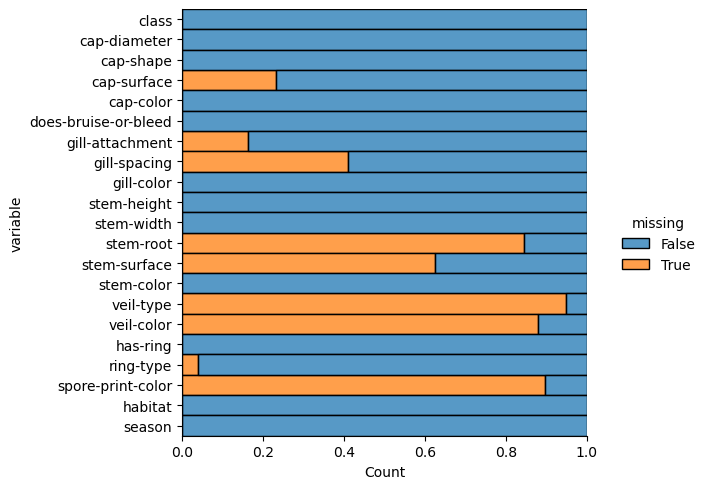

In [16]:
sns.displot(
    data=mushroom.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

In [17]:
mushroom['veil-color']
#mushroom['veil-color'].value_counts()

#mushroom['veil-color'].isna().sum()

0          w
1          w
2          w
3          w
4          w
        ... 
61064    NaN
61065    NaN
61066    NaN
61067    NaN
61068    NaN
Name: veil-color, Length: 61069, dtype: object

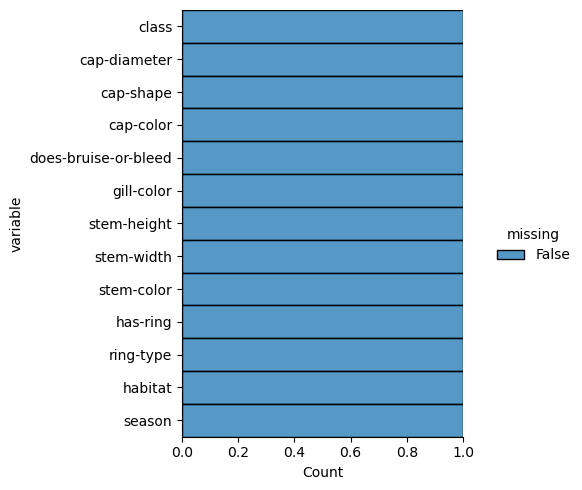

In [18]:
mushroom.drop(
    ['spore-print-color', 'veil-color', 
     'veil-type', 'stem-root',
     'stem-surface','gill-spacing',
     'gill-attachment','cap-surface'],
    axis=1,
    inplace=True)
mushroom.dropna(axis = 0, how = 'any', inplace = True)
sns.displot(
    data=mushroom.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1)


In [19]:
mushroom['cap-shape'] = mushroom['cap-shape'].astype('category')
mushroom['ring-type'] = mushroom['ring-type'].astype('category')
mushroom['stem-color'] = mushroom['stem-color'].astype('category')
mushroom['has-ring'] = mushroom['has-ring'].astype('category')
mushroom['class']= [1 if mushroom['class'][i]=='p' else 0 for i in range(len(mushroom['class']))]
mushroom['habitat'] = mushroom['habitat'].astype('category')
mushroom['season'] = mushroom['season'].astype('category')
mushroom['gill-color'] = mushroom['gill-color'].astype('category')
mushroom['cap-color'] = mushroom['cap-color'].astype('category')
mushroom['does-bruise-or-bleed'] = mushroom['does-bruise-or-bleed'].astype('category')


In [20]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58598 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 58598 non-null  category
 1   cap-diameter          58598 non-null  float64 
 2   cap-shape             58598 non-null  category
 3   cap-color             58598 non-null  category
 4   does-bruise-or-bleed  58598 non-null  category
 5   gill-color            58598 non-null  category
 6   stem-height           58598 non-null  float64 
 7   stem-width            58598 non-null  float64 
 8   stem-color            58598 non-null  category
 9   has-ring              58598 non-null  category
 10  ring-type             58598 non-null  category
 11  habitat               58598 non-null  category
 12  season                58598 non-null  category
dtypes: category(10), float64(3)
memory usage: 2.4 MB


In [21]:
numbers_listing = list(mushroom.select_dtypes('number'))

mushroom[numbers_listing] = MinMaxScaler().fit_transform(mushroom[numbers_listing])
mushroom

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,0.240155,x,o,f,w,0.499705,0.164469,w,t,g,d,w
1,p,0.261782,x,o,f,w,0.530366,0.175055,w,t,g,d,u
2,p,0.220949,x,o,f,w,0.524764,0.170725,w,t,g,d,w
3,p,0.222563,f,e,f,w,0.464917,0.153787,w,t,p,d,w
4,p,0.230148,x,o,f,w,0.487323,0.165528,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,0.012912,s,y,f,f,0.115861,0.059859,y,f,f,d,a
61065,p,0.014364,f,y,f,f,0.093750,0.052257,y,f,f,d,a
61066,p,0.014364,s,y,f,f,0.113797,0.061303,y,f,f,d,u
61067,p,0.013880,f,y,f,f,0.104953,0.052353,y,f,f,d,u


In [22]:
category_list = list(mushroom.select_dtypes('category'))
poisonous_one_hot = pd.get_dummies(mushroom, columns = category_list, dtype = int)
poisonous_one_hot

,cap-diameter,stem-height,stem-width,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0.240155,0.499705,0.164469,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.261782,0.530366,0.175055,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.220949,0.524764,0.170725,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.222563,0.464917,0.153787,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.230148,0.487323,0.165528,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.012912,0.115861,0.059859,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61065,0.014364,0.093750,0.052257,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
61066,0.014364,0.113797,0.061303,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
61067,0.013880,0.104953,0.052353,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
prevalence = mushroom['class'].value_counts()[0]/len(mushroom['class'])
prevalence

0.5602409638554217

In [25]:
new_poisonous = poisonous_one_hot.drop(['class_e'], axis = 1)

In [26]:
Train, Test = train_test_split(new_poisonous,  train_size = .8, stratify = new_poisonous.class_p)
print(Train.shape)
print(Test.shape)

(46878, 72)
(11720, 72)


In [28]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.class_p)


In [31]:

print(Train.class_p.value_counts()[1]/len(Train.class_p))

print(Tune.class_p.value_counts()[1]/len(Tune.class_p))

print(Test.class_p.value_counts()[1]/len(Test.class_p))

0.5602414778787491
0.5604095563139931
0.5600682593856655


In [44]:
train, test = train_test_split(new_poisonous,  test_size=0.4, stratify = new_poisonous['class_p'])
test, val = train_test_split(test, test_size=0.5, stratify= test['class_p']) 

In [45]:
import random
random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

X_train = train.drop(['class_p'], axis=1).values
y_train = train['class_p'].values

neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [46]:
X_test = test.drop(['class_p'], axis=1).values
y_test = test['class_p'].values

neigh.score(X_test, y_test)

0.9917235494880546

In [47]:
X_val = val.drop(['class_p'], axis=1).values
y_val = val['class_p'].values

neigh.score(X_val, y_val)

0.9912116040955632

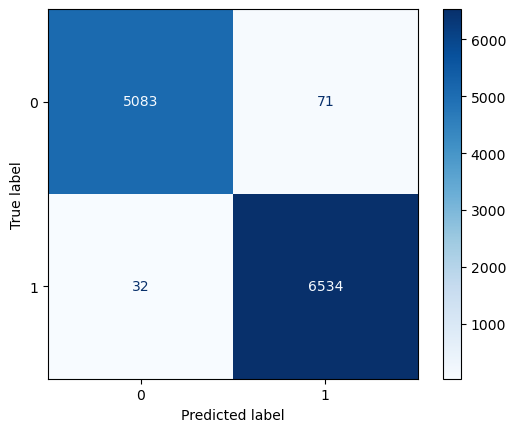

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(neigh, X_val, y_val, cmap = 'Blues') 
plt.show()

In [49]:
from sklearn.metrics import classification_report

y_val_pred = neigh.predict(X_val)
print(classification_report(y_val_pred, y_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5115
           1       1.00      0.99      0.99      6605

    accuracy                           0.99     11720
   macro avg       0.99      0.99      0.99     11720
weighted avg       0.99      0.99      0.99     11720



In [50]:
def chooseK(k, X_train, y_train, X_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k")    # I'll include this so you can see the progress of the function as it runs
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(X_train, y_train)
    
    # calculate accuracy
    accu = class_knn.score(X_test, y_test)
    return accu

In [51]:
test = pd.DataFrame({'k':list(range(1,22,2)), 
                     'accu':[chooseK(x, X_train, y_train, X_test, y_test) for x in list(range(1, 22, 2))]})

calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k


In [52]:
test

,k,accu
0,1,0.996672
1,3,0.995051
2,5,0.994283
3,7,0.992491
4,9,0.991724
5,11,0.990188
6,13,0.989078
7,15,0.987031
8,17,0.986604
9,19,0.984898


In [53]:
test = test.sort_values(by=['accu'], ascending=False)
test

,k,accu
0,1,0.996672
1,3,0.995051
2,5,0.994283
3,7,0.992491
4,9,0.991724
5,11,0.990188
6,13,0.989078
7,15,0.987031
8,17,0.986604
9,19,0.984898


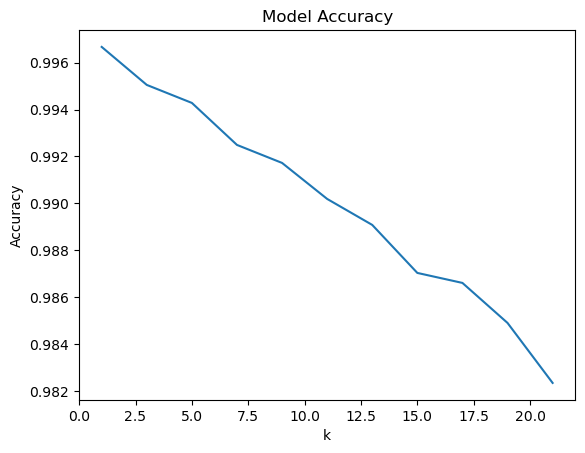

In [54]:
plt.plot(test['k'], test['accu'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [55]:
test_probs = neigh.predict_proba(X_test)
test_preds = neigh.predict(X_test)

In [56]:
test_probabilities = pd.DataFrame(test_probs, columns = ['edible_prob', 'poisonous_prob'])
test_probabilities

,edible_prob,poisonous_prob
0,1.000000,0.000000
1,0.000000,1.000000
2,0.777778,0.222222
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
11715,1.000000,0.000000
11716,0.000000,1.000000
11717,1.000000,0.000000
11718,1.000000,0.000000


In [58]:
final_model = pd.DataFrame({'actual_class': y_test.tolist(),
                           'pred_class': test_preds.tolist(),
                           'pred_prob': [test_probabilities['poisonous_prob'][i] if test_preds[i]==1 else test_probabilities['edible_prob'][i] for i in range(len(test_preds))]})

In [59]:
final_model.head()

,actual_class,pred_class,pred_prob
0,0,0,1.000000
1,1,1,1.000000
2,0,0,0.777778
3,0,0,1.000000
4,0,0,1.000000


In [60]:
final_model['pos_pred'] = [final_model.pred_prob[i] if final_model.pred_class[i]==1 else 1-final_model.pred_prob[i] for i in range(len(final_model.pred_class))]

In [61]:
final_model.head()

,actual_class,pred_class,pred_prob,pos_pred
0,0,0,1.000000,0.000000
1,1,1,1.000000,1.000000
2,0,0,0.777778,0.222222
3,0,0,1.000000,0.000000
4,0,0,1.000000,0.000000


In [62]:
final_model.actual_class = final_model.actual_class.astype('category')
final_model.pred_class = final_model.pred_class.astype('category')

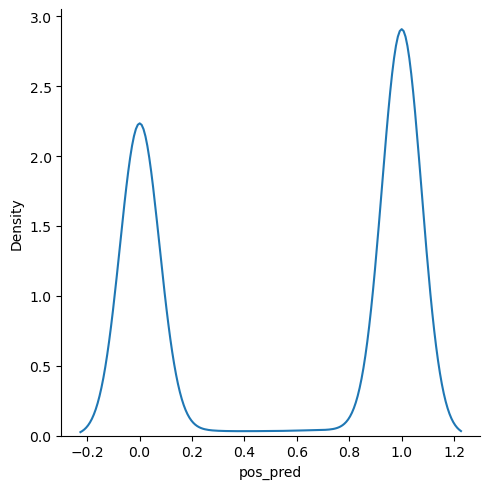

In [63]:
import seaborn as sns

sns.displot(final_model, x="pos_pred", kind="kde")

In [64]:
final_model.pos_pred.value_counts()

pos_pred
1.000000    6395
0.000000    4917
0.888889      82
0.666667      53
0.222222      51
0.111111      50
0.777778      49
0.444444      42
0.555556      42
0.333333      39
Name: count, dtype: int64

In [65]:
from sklearn.metrics import confusion_matrix

def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = confusion_matrix(z, thres)  
    print(con_mat)

In [66]:
confusion_matrix(final_model.actual_class, final_model.pred_class)

array([[5078,   76],
       [  21, 6545]])

In [76]:
adjust_thres(final_model.pos_pred, .4, final_model.actual_class)

[[5046  108]
 [  11 6555]]


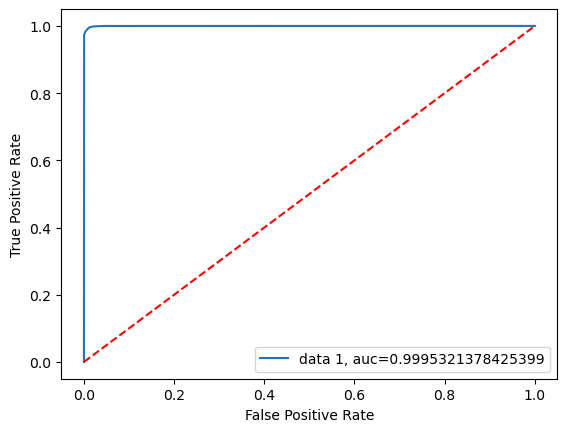

In [77]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, final_model.pos_pred)
auc = metrics.roc_auc_score(y_test, final_model.pos_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()